In [36]:
import tifffile as tiff
import matplotlib.pyplot as plt
import rasterio
import os
import numpy as np
import gdal
#from affine import Affine
import affine

from rasterio.plot import show, show_hist

%matplotlib inline

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x16093aea188>)

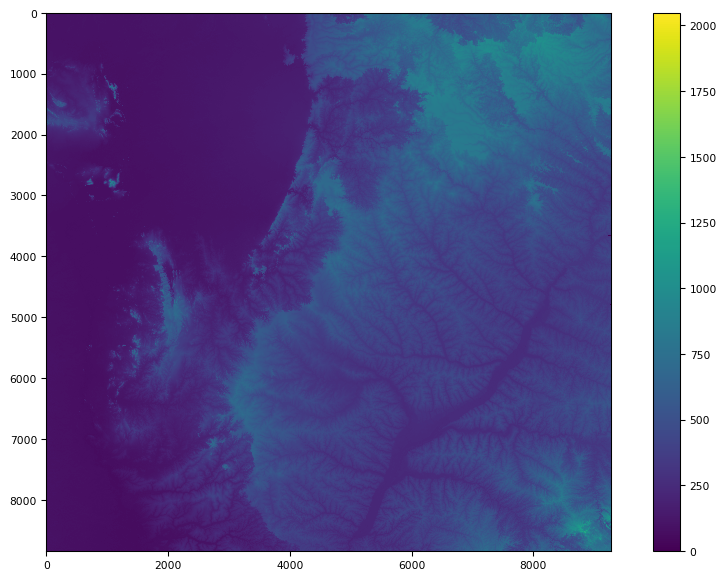

In [13]:
altitudeDataset = tiff.imread('./Shapefiles/ms.tif')
tiff.imshow(altitude_file)

In [57]:
coords = ((-55.109899, -20.418126))
demdata = gdal.Open('./Shapefiles/ms.tif')
demarray = np.array(demdata.GetRasterBand(1).ReadAsArray())

98

In [62]:
#Transform columns in lon lat
affine_transform = affine.Affine.from_gdal(*demdata.GetGeoTransform())
lon, lat = affine_transform * (xmax, ymax)
print(lon, lat)

#Transform lon lat in columns
inverse_transform = ~affine_transform
px, py = [round(f) for f in inverse_transform * (lon, lat)]
print(px, py)

-51.11118076862745 -23.98621100963365
8848.0 8528.0


In [40]:
def retrieve_pixel_value(geo_coord, data_source):
    """Return floating-point value that corresponds to given point."""
    x, y = geo_coord[0], geo_coord[1]
    forward_transform =  \
        affine.Affine.from_gdal(*data_source.GetGeoTransform())
    reverse_transform = ~forward_transform
    px, py = reverse_transform * (x, y)
    px, py = int(px + 0.5), int(py + 0.5)
    pixel_coord = px, py

    data_array = np.array(data_source.GetRasterBand(1).ReadAsArray())
    return data_array[pixel_coord[0]][pixel_coord[1]]